

# Project: Investigate a Dataset - [TMDB Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In the world of cinema and production, there is always a competition between movies, that's why I chose the 1st dataset which consists of approximate values of 10900 movies to have investigations on to find out some treasures that were hidden, the dataset investigated consisted of 21 columns represents the movie attributes (Ex: movie name, director, budget, revenue, cast ....) and 10866 rows which represents the movies.


### Question(s) for Analysis
>The main question that will be addressed in this investigation are :
>>1 - what is the genre that appered most in the dataset and if  it is correlated to number of movies made, revenue and profit ?

>>2 - does the director has an influence on the revenue or popularity?!

>>3 - Is there a relation between popularity and Revenue?!

>>4-what season has the most propability to drop new movies?!



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning

 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.drop(['homepage','id','imdb_id','tagline','keywords','overview','budget_adj','revenue_adj'], axis=1, inplace=True)

#### here we are going to drop these columns, we will not need it in this investigation

In [6]:
def split_delete(df,column):
    df[column] = df[column].str.split('|', expand = True)[0]
    

In [7]:
split_delete(df,'cast')

In [8]:
df.rename(columns = {'cast':'main_actor'}, inplace =True)

##### changed the cast columns to main actor only and dragged the member of the cast

In [10]:
split_delete(df, 'genres')

In [11]:
df.rename(columns = {'genres':'main_genre'}, inplace =True)

##### took the main genre of all genres given

In [12]:
split_delete(df,'production_companies')

In [13]:
df.rename(columns = {'production_companies': "production_company"}, inplace = True)

##### reducing the number of production companies

In [14]:
df.rename(columns = {'original_title': "movie_title"}, inplace = True)

In [15]:
df['release_date'] = pd.to_datetime(df['release_date']).dt.month_name()

In [16]:
df.rename(columns = {'release_date':'release_month', }, inplace = True)

###### changing the column of release date to release month, we will use it later

In [17]:
df.insert(3, 'profit', df['revenue'] - df['budget'])

##### inserting a new column (profit) 

In [18]:
df.head()

,popularity,budget,revenue,profit,movie_title,main_actor,director,runtime,main_genre,production_company,release_month,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,June,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,May,6185,7.1,2015
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,March,2480,6.3,2015
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,December,5292,7.5,2015
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,April,2947,7.3,2015


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   popularity          10866 non-null  float64
 1   budget              10866 non-null  int64  
 2   revenue             10866 non-null  int64  
 3   profit              10866 non-null  int64  
 4   movie_title         10866 non-null  object 
 5   main_actor          10790 non-null  object 
 6   director            10822 non-null  object 
 7   runtime             10866 non-null  int64  
 8   main_genre          10843 non-null  object 
 9   production_company  9836 non-null   object 
 10  release_month       10866 non-null  object 
 11  vote_count          10866 non-null  int64  
 12  vote_average        10866 non-null  float64
 13  release_year        10866 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [20]:
df.duplicated().sum()

1

In [21]:
df.drop_duplicates(inplace = True)

In [22]:
df.duplicated().sum()

0

##### successfully deleting duplicates

In [23]:
split_delete(df,'director')

In [24]:
df.isnull().sum()

popularity               0
budget                   0
revenue                  0
profit                   0
movie_title              0
main_actor              76
director                44
runtime                  0
main_genre              23
production_company    1030
release_month            0
vote_count               0
vote_average             0
release_year             0
dtype: int64

In [25]:
df.fillna('Not Specified', inplace=True)

In [26]:
df.isnull().sum()

popularity            0
budget                0
revenue               0
profit                0
movie_title           0
main_actor            0
director              0
runtime               0
main_genre            0
production_company    0
release_month         0
vote_count            0
vote_average          0
release_year          0
dtype: int64

##### filling all nan value with string "not specified"

In [27]:
df.describe()

,popularity,budget,revenue,profit,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,2.520261e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,9.659103e+07,31.382701,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,-4.139124e+08,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,9.092453e+06,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,900.000000,9767.000000,9.200000,2015.000000


In [29]:
def replace_by_mean(df, column):
    df[column]=df[column].replace(0,df[column].mean())
    

In [30]:
replace_by_mean(df, 'revenue')
replace_by_mean(df, 'budget')

In [32]:
df.describe()

,popularity,budget,revenue,profit,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,2.229110e+07,6.187923e+07,2.520261e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,2.801385e+07,1.110236e+08,9.659103e+07,31.382701,575.644627,0.935138,12.813260
min,0.000065,1.000000e+00,2.000000e+00,-4.139124e+08,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,1.462429e+07,3.982690e+07,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,1.462429e+07,3.982690e+07,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,3.982690e+07,9.092453e+06,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (what is the genre that appered most in the dataset (is genre correlated to number of movies made, revenue and profit?!))

In [33]:
df.head()

,popularity,budget,revenue,profit,movie_title,main_actor,director,runtime,main_genre,production_company,release_month,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,1363528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,June,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,228436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,May,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,185238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,March,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,1868178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,December,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,1316249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,April,2947,7.3,2015


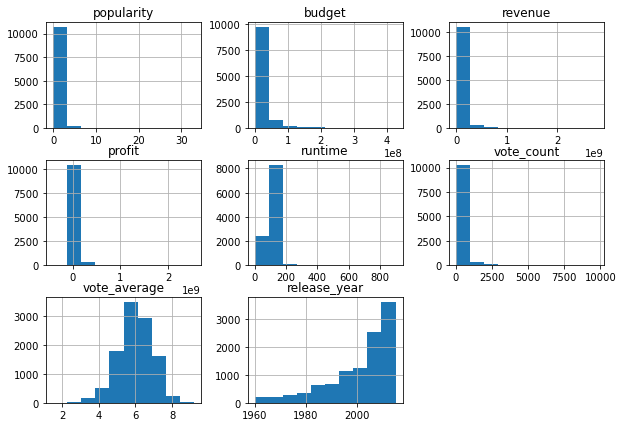

In [34]:
df.hist(figsize = (10,7));

In [35]:
df['main_genre'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Not Specified        23
Foreign               9
Name: main_genre, dtype: int64

##### we can see that number of movies with the genre drama is highest above all

Text(0, 0.5, 'Movies')

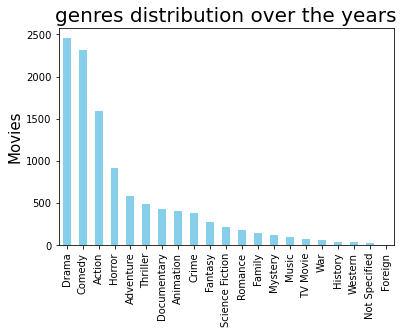

In [36]:
df_1 = df['main_genre'].value_counts().plot.bar(color='skyblue')
plt.title('genres distribution over the years', fontsize=20)
plt.ylabel("Movies", fontsize = 15)


##### yup, genre does affect the number of movies, we can see that Drama and Comedy and Action are the most Popular genres 
#### but Let's see if there is a relation between the genre and the Total Revenue

In [37]:
df_revenue = df.groupby('main_genre')['revenue'].sum().sort_values(ascending = False)
df_revenue

main_genre
Action             1.270736e+11
Comedy             1.184928e+11
Drama              1.132940e+11
Adventure          8.238667e+10
Animation          4.006806e+10
Horror             3.897032e+10
Thriller           2.463272e+10
Fantasy            2.372041e+10
Science Fiction    2.146719e+10
Crime              1.963568e+10
Documentary        1.455266e+10
Family             1.263801e+10
Romance            1.110923e+10
Mystery            5.927245e+09
Music              4.773883e+09
War                4.182147e+09
TV Movie           3.108671e+09
History            2.867886e+09
Western            2.142185e+09
Not Specified      9.160186e+08
Foreign            3.584421e+08
Name: revenue, dtype: float64

##### computing the sum of all genres revenues

In [38]:
df_profit = df.groupby('main_genre')['profit'].sum().sort_values(ascending = False)
df_profit

main_genre
Action             57418137853
Adventure          49530172479
Comedy             43884561239
Drama              36344800673
Animation          20135612280
Fantasy            11925896473
Science Fiction    11672539853
Horror             10292764476
Crime               7617610976
Thriller            7020512237
Family              6211564578
Romance             4976393563
Mystery             1756590111
War                 1361341908
Music               1252415911
History             1250748175
Documentary          666094035
Western              486105966
TV Movie              22500000
Foreign                      0
Not Specified            -5000
Name: profit, dtype: int64

##### Although we can see that the genre "Action" is not the genre with the most movies made but it has the most income and Profit as well

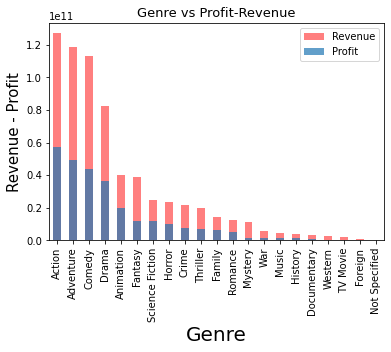

In [39]:
df_revenue.plot(kind = 'bar', alpha = 0.5, label = 'Revenue', color = 'red')
df_profit.plot(kind = 'bar', alpha=0.7, label = 'Profit')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Revenue - Profit', fontsize = 15)
plt.title('Genre vs Profit-Revenue', fontsize = 13)
plt.legend();

#### we can conclude here that not always the genre with the most movies must come with the most Income nor the most Profit

### let's see if there is a correlation between the Revenue and the Profit

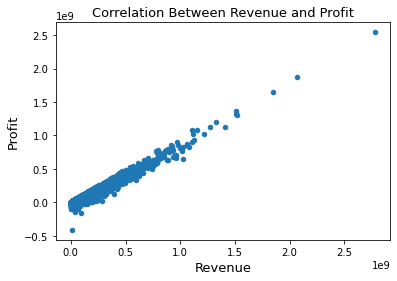

In [40]:
df.plot(x = 'revenue', y='profit', kind = 'scatter')
plt.xlabel('Revenue',fontsize = 13)
plt.ylabel('Profit',fontsize = 13)
plt.title('Correlation Between Revenue and Profit', fontsize = 13);

#### From the prespective of the two previous plots we can see that : 
#### 1- Revenue and Profit has a Positive correlation which means when revenue increases, Profit increases as well 
#### 2- The profit and Revenue does not depend on the number of movies of the genre (EX : Action genre made a lot more Than Drama but there is more drama movies than action)

### Research Question 2  (does the director has an influence on the revenue or popularity?!)

In [41]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.head()

,popularity,budget,revenue,profit,movie_title,main_actor,director,runtime,main_genre,production_company,release_month,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,1363528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,June,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,228436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,May,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,185238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,March,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,1868178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,December,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,1316249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,April,2947,7.3,2015


In [42]:
directors = list(df['director'].unique())

In [43]:
df['director'].value_counts()

Woody Allen              46
Not Specified            44
Clint Eastwood           34
Martin Scorsese          30
Steven Spielberg         29
                         ..
John Stainton             1
Liv Ullmann               1
Ajmal Zaheer Ahmad \t     1
Chris Nash                1
Harold P. Warren          1
Name: director, Length: 4838, dtype: int64

#### get a list with all directors and the number of movies they made

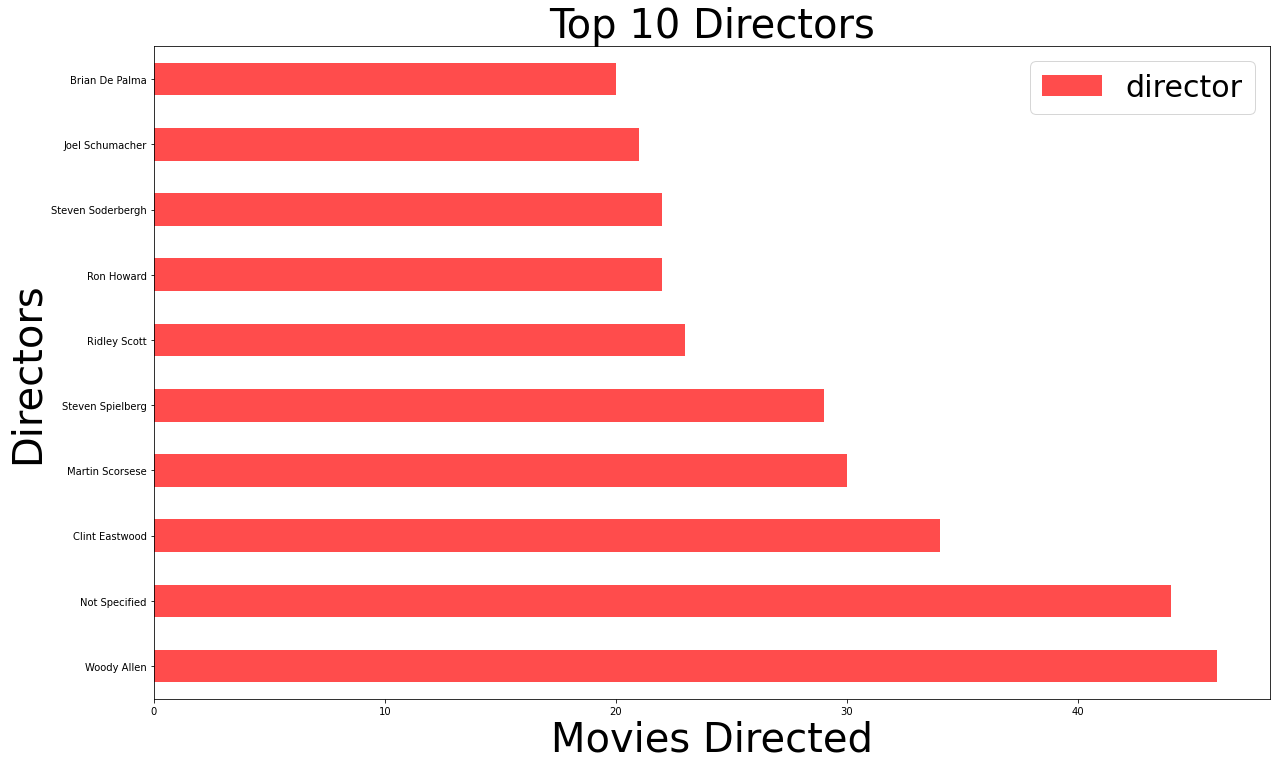

In [82]:
df['director'].value_counts().head(10).plot.barh(figsize=(20,12),color='red', alpha=0.7)
plt.title("Top 10 Directors", fontsize = 40)
plt.xlabel("Movies Directed", fontsize = 40)
plt.ylabel('Directors', fontsize =40)
plt.legend(prop={'size': 30})
plt.show()

##### the director with most movie directed is Woody Allen with 46 movies, we will continue investingating on the top 3 directors only

In [45]:
df['director'].value_counts().head(4)

Woody Allen        46
Not Specified      44
Clint Eastwood     34
Martin Scorsese    30
Name: director, dtype: int64

##### getting the top 3 directors with number of movies directed, ignoring the not specified field

In [46]:
df.groupby('popularity')['director'].describe()

,count,unique,top,freq
popularity,,,,
0.000065,1,1,Not Specified,1
0.000188,1,1,Arthur Hiller,1
0.000620,1,1,Darren Stein,1
0.000973,1,1,Pascal Thomas,1
0.001115,1,1,Dibakar Banerjee,1
...,...,...,...,...
13.112507,1,1,Robert Schwentke,1
14.311205,1,1,James Gunn,1
24.949134,1,1,Christopher Nolan,1


#### we will now analyse if the top 3 directors and Movies popularity are correlated

In [47]:
pop_mean = df.popularity.mean()
pop_mean

0.6464455549010583

In [48]:
df['director'].value_counts().head(4)

Woody Allen        46
Not Specified      44
Clint Eastwood     34
Martin Scorsese    30
Name: director, dtype: int64

In [49]:
directors_top = list(df['director'].value_counts().head(4).index)
directors_top

['Woody Allen', 'Not Specified', 'Clint Eastwood', 'Martin Scorsese']

##### creating a list with directors names and dropping the not specified because it means that there are 44 movies in the data set without their directors names

In [50]:
directors_top.remove('Not Specified')


In [51]:
directors_top

['Woody Allen', 'Clint Eastwood', 'Martin Scorsese']

In [52]:
means_list =[]

##### creating a means list to put the popularity means of all 3 three directors

In [53]:
# 1 director 
df_w =df.query('director == "Woody Allen"')

#### creating a mask to get all movies with the director Woody Allen

In [54]:
df_w['popularity'].mean()

0.5590871521739128

##### getting the mean popularity for Woody's movies

In [56]:
df_w1 = list(df_w['popularity'])

##### creating a list of all movies popularity values of director Woody Allen 

In [57]:
# 2 director 
df_c =df.query('director == "Clint Eastwood"')

In [58]:
df_c['popularity'].mean()

0.8300373235294114

##### getting the mean popularity for Clint Eastwood

In [59]:
df_c1 = list(df_c['popularity'])


##### creating a list of all movies popularity values of director Clint Eastwood

In [60]:
# 3 director 
df_m =df.query('director == "Martin Scorsese"')

In [61]:
df_m['popularity'].mean()

1.0974256333333332

##### getting the mean popularity for Martin Scorsese

In [62]:
df_m1 = list(df_m['popularity'])

##### creating a list of all movies popularity values of director Martin Scorsese

In [63]:
df_x = df.query('director == "Martin Scorsese" or director == "Woody Allen" or director == "Clint Eastwood"')
df_x

,popularity,budget,revenue,profit,movie_title,main_actor,director,runtime,main_genre,production_company,release_month,vote_count,vote_average,release_year
155,1.007054,1.100000e+07,2.739108e+07,16391084,Irrational Man,Emma Stone,Woody Allen,95,Mystery,Sony Pictures,July,319,6.1,2015
572,0.082569,1.462429e+07,3.982690e+07,0,The Audition,Leonardo DiCaprio,Martin Scorsese,16,Comedy,RatPac Entertainment,October,10,6.1,2015
657,3.863074,5.880000e+07,5.423074e+08,483507423,American Sniper,Bradley Cooper,Clint Eastwood,134,War,Village Roadshow Pictures,December,3004,7.5,2014
790,0.889247,1.462429e+07,3.233933e+07,32339326,Magic in the Moonlight,Colin Firth,Woody Allen,97,Comedy,Perdido Productions,July,464,6.3,2014
803,0.797723,4.000000e+07,6.734701e+07,27347013,Jersey Boys,Christopher Walken,Clint Eastwood,134,Music,Warner Bros.,June,181,6.7,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10609,0.568400,2.000000e+06,1.834473e+07,16344729,Sleeper,Woody Allen,Woody Allen,89,Science Fiction,Rollins-Joffe Productions,December,93,6.9,1973
10729,0.589059,1.500000e+06,3.982690e+07,-1500000,Take the Money and Run,Woody Allen,Woody Allen,85,Comedy,Palomar Pictures,August,77,6.9,1969
10804,0.149259,1.462429e+07,3.982690e+07,0,Interiors,Diane Keaton,Woody Allen,93,Drama,Not Specified,August,35,6.3,1978
10817,0.064029,1.462429e+07,3.219520e+05,321952,The Last Waltz,Robbie Robertson,Martin Scorsese,117,Documentary,FM Productions,May,33,8.0,1978


##### getting the movies that the 3 directors directed

In [64]:
df_x['popularity']

155      1.007054
572      0.082569
657      3.863074
790      0.889247
803      0.797723
           ...   
10609    0.568400
10729    0.589059
10804    0.149259
10817    0.064029
10864    0.064317
Name: popularity, Length: 110, dtype: float64

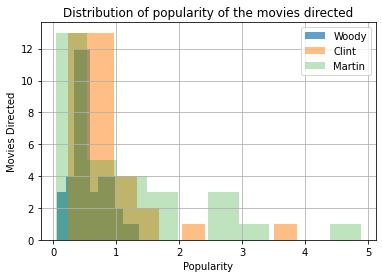

In [94]:
df_w['popularity'].hist(alpha = 0.7, label = 'Woody')
df_c['popularity'].hist(alpha = 0.5, label = 'Clint')
df_m['popularity'].hist(alpha = 0.3, label = 'Martin')
plt.ylabel('Movies Directed')
plt.xlabel('Popularity')
plt.title('Distribution of popularity of the movies directed')
plt.legend();

##### we can see that woody has more stable popularity than the other two between the 0.3 and 0.6 popularity for more than 10 movies but the other two have a lot of variations

In [69]:

means_list.append(df_w['popularity'].mean())
means_list.append(df_c['popularity'].mean())
means_list.append(df_m['popularity'].mean()) 

##### adding the 3 popularity means into a list

In [73]:

means_list

[0.5590871521739128, 0.8300373235294114, 1.0974256333333332]

### To be able to visualize more, plotting a clear bar chart will help see the difference

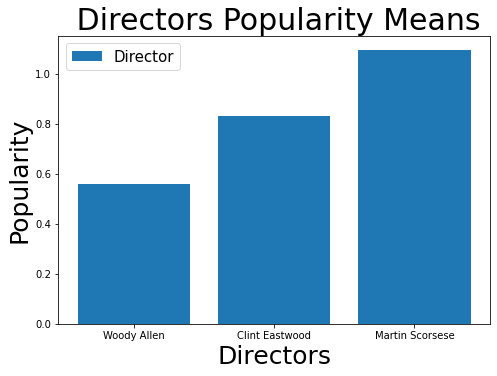

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(directors_top,means_list,label = 'Director')
plt.title(" Directors Popularity Means", fontsize = 30)
plt.ylabel("Popularity", fontsize =25)
plt.xlabel('Directors', fontsize = 25)
plt.legend(prop={'size': 15})
plt.show()

#### we can see here more clearly that it is not always the director who made a lot of movies have the best popularity, it depends on the quality of the movie that the director directed and other prespectives

##### The turn to see if the director is related with Revenue

In [77]:
df.groupby('director').describe()

popularity                                          \
                        count      mean       std       min       25%   
director                                                                
 FrÃ©dÃ©ric Jardin        1.0  0.434506       NaN  0.434506  0.434506   
A. Todd Smith             1.0  1.876037       NaN  1.876037  1.876037   
A.R. Murugadoss           1.0  0.215030       NaN  0.215030  0.215030   
Aaron Aites               1.0  0.108700       NaN  0.108700  0.108700   
Aaron Blaise              1.0  1.653031       NaN  1.653031  1.653031   
...                       ...       ...       ...       ...       ...   
Ã‡aÄŸan Irmak             1.0  0.265008       NaN  0.265008  0.265008   
Ã‰mile Gaudreault         1.0  0.276911       NaN  0.276911  0.276911   
Ã‰ric Besnard             1.0  0.081724       NaN  0.081724  0.081724   
Ã‰tienne Chatiliez        3.0  0.102346  0.080174  0.047949  0.056310   
Ã€lex Pastor              1.0  0.619369       NaN  0.619369  0.619369   

                                                 budget                ...  \
                         50%       75%       max  count          mean  ...   
director                                                               ...   
 FrÃ©dÃ©ric Jardin  0.434506  0.434506  0.434506    1.0  2.500000e+06  ...   
A. Todd Smith       1.876037  1.876037  1.876037    1.0  1.462429e+07  ...   
A.R. Murugadoss     0.215030  0.215030  0.215030    1.0  9.100000e+06  ...   
Aaron Aites         0.108700  0.108700  0.108700    1.0  1.462429e+07  ...   
Aaron Blaise        1.653031  1.653031  1.653031    1.0  1.000000e+08  ...   
...                      ...       ...       ...    ...           ...  ...   
Ã‡aÄŸan Irmak       0.265008  0.265008  0.265008    1.0  1.462429e+07  ...   
Ã‰mile Gaudreault   0.276911  0.276911  0.276911    1.0  4.361898e+06  ...   
Ã‰ric Besnard       0.081724  0.081724  0.081724    1.0  1.462429e+07  ...   
Ã‰tienne Chatiliez  0.064672  0.129545  0.194418    3.0  1.420452e+07  ...   
Ã€lex Pastor        0.619369  0.619369  0.619369    1.0  1.462429e+07  ...   

                   vote_average      release_year                         \
                            75%  max        count         mean       std   
director                                                                   
 FrÃ©dÃ©ric Jardin          5.9  5.9          1.0  2011.000000       NaN   
A. Todd Smith               5.4  5.4          1.0  2015.000000       NaN   
A.R. Murugadoss             6.9  6.9          1.0  2008.000000       NaN   
Aaron Aites                 6.5  6.5          1.0  2008.000000       NaN   
Aaron Blaise                6.8  6.8          1.0  2003.000000       NaN   
...                         ...  ...          ...          ...       ...   
Ã‡aÄŸan Irmak               8.2  8.2          1.0  2005.000000       NaN   
Ã‰mile Gaudreault           5.2  5.2          1.0  2003.000000       NaN   
Ã‰ric Besnard               5.1  5.1          1.0  2010.000000       NaN   
Ã‰tienne Chatiliez          7.2  7.2          3.0  1994.666667  6.506407   
Ã€lex Pastor                5.7  5.7          1.0  2009.000000       NaN   

                                                            
                       min     25%     50%     75%     max  
director                                                    
 FrÃ©dÃ©ric Jardin  2011.0  2011.0  2011.0  2011.0  2011.0  
A. Todd Smith       2015.0  2015.0  2015.0  2015.0  2015.0  
A.R. Murugadoss     2008.0  2008.0  2008.0  2008.0  2008.0  
Aaron Aites         2008.0  2008.0  2008.0  2008.0  2008.0  
Aaron Blaise        2003.0  2003.0  2003.0  2003.0  2003.0  
...                    ...     ...     ...     ...     ...  
Ã‡aÄŸan Irmak       2005.0  2005.0  2005.0  2005.0  2005.0  
Ã‰mile Gaudreault   2003.0  2003.0  2003.0  2003.0  2003.0  
Ã‰ric Besnard       2010.0  2010.0  2010.0  2010.0  2010.0  
Ã‰tienne Chatiliez  1988.0  1991.5  1995.0  1998.0  2001.0  
Ã€lex Pastor        2009.0  2009.0  2009.0  2

In [78]:
df_list = []
for director in directors:
    df_list.append(df.query('director == @director' ))
len(directors),len(df_list)

(4838, 4838)

##### creating a list of dataframes in which dataframe is the data about a movie a single director made

In [79]:
director_mean_list = []
for i in range(len(df_list)):
    director_mean_list.append((directors[i],df_list[i].revenue.mean()))
len(director_mean_list)

4838

##### getting a tuple with the name and the mean of the revenue

In [86]:
for i in range(3):
    print(director_mean_list[i])

('Colin Trevorrow', 758768301.0)
('George Miller', 134910470.7777778)
('Robert Schwentke', 150633750.8)


In [87]:
director_mean_list.sort(key=lambda i:i[1],reverse=True)
for i in range(10):
    print(director_mean_list[i]) 

('David Yates', 838824504.2153704)
('Lee Unkrich', 812994083.5)
('Colin Trevorrow', 758768301.0)
('Robert Stromberg', 758410378.0)
('Pierre Coffin', 757137935.0)
('Dan Scanlon', 743559607.0)
('Bob Peterson', 731342744.0)
('J.J. Abrams', 715833983.2)
('Joe Russo', 714766572.0)
('Chris Miller', 676972821.0)


##### sorting the list of tuples with descending method

In [88]:
x_val, y_val = list(zip(*director_mean_list[:11]))


##### creating two lists for director names and revenue means

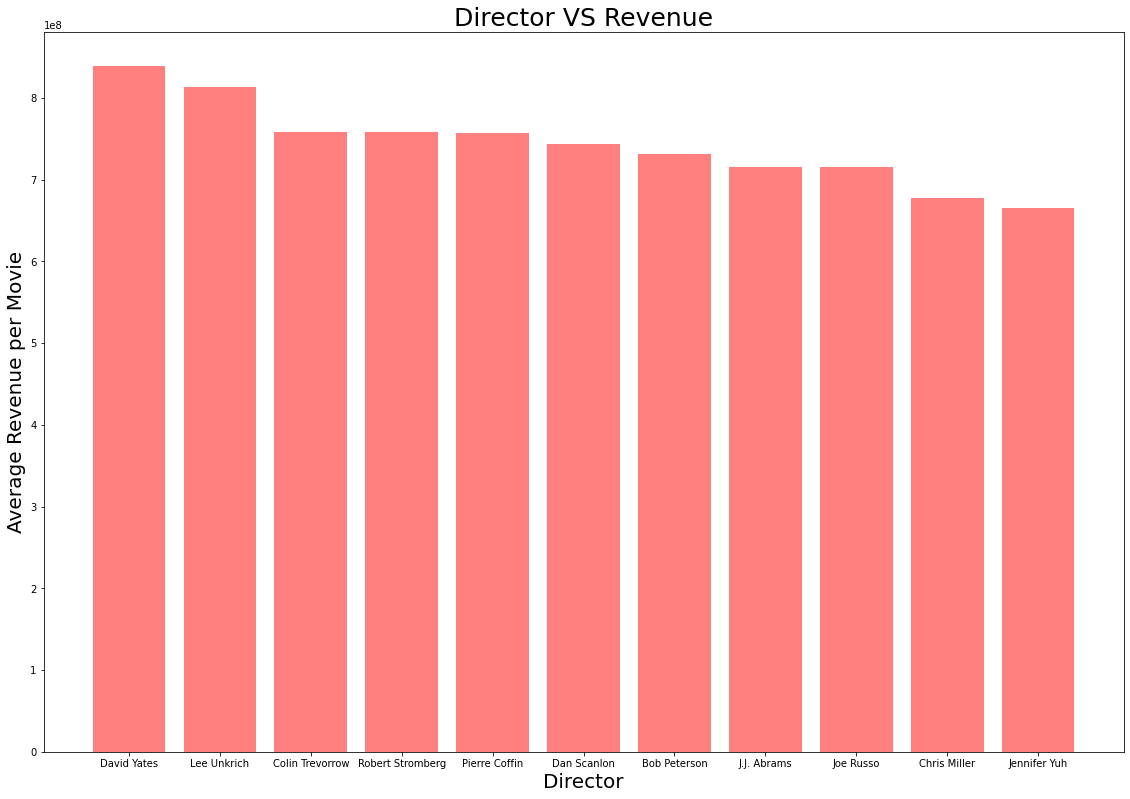

In [89]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(x_val,y_val, alpha = 0.5, color = 'red')
plt.title("Director VS Revenue", fontsize = 25)
plt.xlabel("Director", fontsize = 20)
plt.ylabel('Average Revenue per Movie', fontsize = 20);


### we can see here that there is no correlation between the number of movies directed by the same director and the revenue !! 

### Research Question 3  (Is there a relation between popularity and Revenue?!)

In [90]:
df.head()

,popularity,budget,revenue,profit,movie_title,main_actor,director,runtime,main_genre,production_company,release_month,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,1363528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,June,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,228436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,May,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,185238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,March,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,1868178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,December,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,1316249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,April,2947,7.3,2015


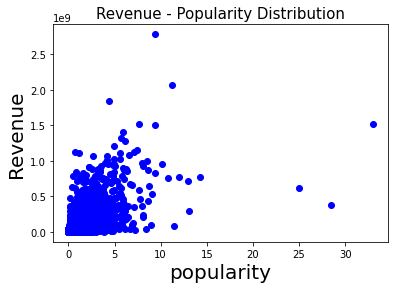

In [91]:
plt.scatter(df['popularity'],df['revenue'], c ="blue");
plt.title("Revenue - Popularity Distribution", fontsize = 15)
plt.xlabel('popularity',fontsize = 20)
plt.ylabel('Revenue',fontsize = 20);


 #### it can be seen that there is a relatively low positive correlation between the two vairables, as long as the popularity is up the revenue is going up as well (EX: As Marvel Movies Nowadays)

### Research Question 4  (what season has the most propability to drop new movies?!)

In [95]:
# know the distribution

df['release_month'].value_counts()

September    1331
October      1153
December      985
January       919
August        918
June          827
March         822
November      814
May           809
July          799
April         797
February      691
Name: release_month, dtype: int64

##### getting number of movies released in every month

In [96]:

season_movies = list(df['release_month'].value_counts())
season_movies

[1331, 1153, 985, 919, 918, 827, 822, 814, 809, 799, 797, 691]

##### to get list of the counts of movies released in the correspondant month

In [97]:

months = list(df["release_month"].value_counts().index)
months

['September',
 'October',
 'December',
 'January',
 'August',
 'June',
 'March',
 'November',
 'May',
 'July',
 'April',
 'February']

##### list of the months

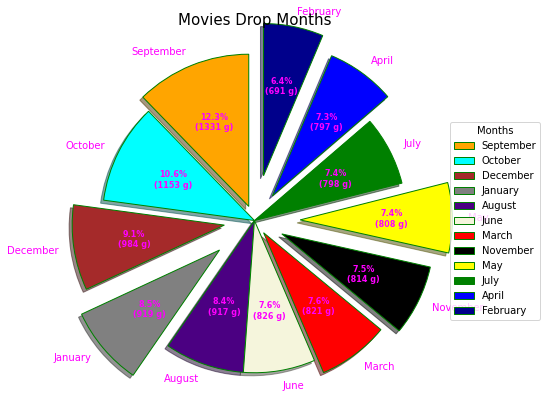

In [99]:

explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.1,0.2,0.3,0.0,0.2,0.3)
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige",'red','black','yellow',
         'green','blue','darkblue')
 
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(season_movies,
                                  autopct = lambda pct: func(pct, season_movies),
                                  explode = explode,
                                  labels = months,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, months,
          title ='Months',
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Movies Drop Months",fontsize = 15)
 

plt.show()

###### we can see that the fall season is the most probable to release more movies than other season because it has the 4 highest months with movie releases

<a id='conclusions'></a>
## Conclusions


 

>Finally at the end of the investigation we can conclude and answer accurately the questions addressed before 




> 1- We can see that the highest genre with number of movies over the years was the "Drama" genre then comes the comedy and after the action genre and there is no correlation between the genre with the most movies made and profit nor revenue, as clearly shown the action genre came in first place in total revenue and profit although it was the genre with the third most number of movies

>2- the popularity of the movie does not deppend on the director who made the highest number of movies, ir depends on the quality of the movie directed and more other prespectives and there is no correlation between the number of movies directed by the same director and the revenue 

>3- there exist a small positive correlation between the popularity of the movie and the revenue it gets, however it is not always stable 

>4- The fall season is the most probable season to drop new movies in theaters

### Limitations
>The data investigated was large and it had to be cleaned properly.






>> 1 - in the investigation above not all the columns were needed to provide the results listed such as (homepage, id, imdb_id, tagline, keywords, overview, budget_adj, revenue_adj) columns were dropped. 

>> 2 - Ecountered a lot of nan values that were filled by the string 'Not Specified' and found only duplicate row. 

>> 3 - Also noticed some budgets and revenues with 0 values that make no sense so i filled all 0's with the mean value of the column.

>> 4 - To simplify, I rewrote these columns (cast, production companies, director, genres, release date) into new columns while taking only the first element in the cell and changing these columns name int (main actor, production company, director, main genre) respectively except the release date column i changed it into date time object then extracted the month value only.


>> 5 - There were no clear correlation between number of movies made and popularity of director and genre revenue.

>> 6 - At the other hand there were clear positive correlation between revenue and popularity and profit

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])